# 信用卡違約(default)預測
### 範例資料集：台灣2005年信用卡逾期還款(違約)預測
### Kaggle Dataset: https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset

<pre>
There are 25 variables:

ID: ID of each client
LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
SEX: Gender (1=male, 2=female)
EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
MARRIAGE: Marital status (1=married, 2=single, 3=others)
AGE: Age in years
PAY_0: Repayment status in September, 2005
(-2: No consumption; -1: Paid in full; 0: The use of revolving credit; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.)
PAY_2: Repayment status in August, 2005 (scale same as above)
PAY_3: Repayment status in July, 2005 (scale same as above)
PAY_4: Repayment status in June, 2005 (scale same as above)
PAY_5: Repayment status in May, 2005 (scale same as above)
PAY_6: Repayment status in April, 2005 (scale same as above)
BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
default.payment.next.month: Default payment (1=yes, 0=no)
</pre>

## Logistic Function / Sigmoid Function

In [1]:
import numpy as np
def sigmoid(z):
    return 1/(1 + np.exp(-z))

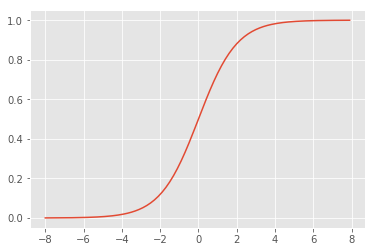

In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

z = np.arange(-8,8,0.1)
y = sigmoid(z)
plt.plot(z,y)
plt.show()

## 資料匯入

In [3]:
import pandas as pd
pd.set_option("display.max.columns",25)
df = pd.read_csv("UCI_Credit_Card.csv",encoding = "big5")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## 預處理

#### 去除PAY = -2 (無消費)、0(使用循環利率)

In [4]:
df = df[(df['PAY_0']!=-2) & (df['PAY_2']!=-2) & (df['PAY_3']!=-2) & (df['PAY_4']!=-2) 
        & (df['PAY_5']!=-2) & (df['PAY_6']!=-2) & (df['PAY_0']!=0) & (df['PAY_2']!=0) 
        & (df['PAY_3']!=0) & (df['PAY_4']!=0) & (df['PAY_5']!=0) & (df['PAY_6']!=0)].reset_index(drop=True)

#### 去除others和unknown的教育程度

In [5]:
df = df[(df['EDUCATION']>=1) & (df['EDUCATION']<=3)].reset_index(drop=True)

#### 名義量尺：性別 one-hot encoding

In [6]:
df_sex = pd.get_dummies(df['SEX'])
df_sex.head()

,1,2
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0


#### 合併回df

In [7]:
df = pd.merge(df,df_sex,left_index=True,right_index=True)
df = df.rename(columns={1:'male',2:'female'})
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,male,female
0,12,260000.0,2,1,2,51,-1,-1,-1,-1,-1,2,...,8517.0,22287.0,13668.0,21818.0,9966.0,8583.0,22301.0,0.0,3640.0,0,0,1
1,22,120000.0,2,2,1,39,-1,-1,-1,-1,-1,-1,...,0.0,632.0,316.0,316.0,316.0,0.0,632.0,316.0,0.0,1,0,1
2,29,50000.0,2,3,1,47,-1,-1,-1,-1,-1,-1,...,2040.0,30430.0,257.0,3415.0,3421.0,2044.0,30430.0,257.0,0.0,0,0,1
3,31,230000.0,2,1,2,27,-1,-1,-1,-1,-1,-1,...,15339.0,14307.0,36923.0,17270.0,13281.0,15339.0,14307.0,37292.0,0.0,0,0,1
4,49,380000.0,1,2,2,32,-1,-1,-1,-1,-1,-1,...,32018.0,11849.0,11873.0,21540.0,15138.0,24677.0,11851.0,11875.0,8251.0,0,1,0


#### 名義量尺：婚姻狀況 one-hot encoding

In [8]:
df_marriage = pd.get_dummies(df['MARRIAGE'])
df_marriage.head()

,0,1,2,3
0,0,0,1,0
1,0,1,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0


In [9]:
df = pd.merge(df,df_marriage,left_index=True,right_index=True)
df = df.rename(columns={1:'married',2:'single'})
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,male,female,0,married,single,3
0,12,260000.0,2,1,2,51,-1,-1,-1,-1,-1,2,...,9966.0,8583.0,22301.0,0.0,3640.0,0,0,1,0,0,1,0
1,22,120000.0,2,2,1,39,-1,-1,-1,-1,-1,-1,...,316.0,0.0,632.0,316.0,0.0,1,0,1,0,1,0,0
2,29,50000.0,2,3,1,47,-1,-1,-1,-1,-1,-1,...,3421.0,2044.0,30430.0,257.0,0.0,0,0,1,0,1,0,0
3,31,230000.0,2,1,2,27,-1,-1,-1,-1,-1,-1,...,13281.0,15339.0,14307.0,37292.0,0.0,0,0,1,0,0,1,0
4,49,380000.0,1,2,2,32,-1,-1,-1,-1,-1,-1,...,15138.0,24677.0,11851.0,11875.0,8251.0,0,1,0,0,0,1,0


## 訓練資料預處理

In [10]:
df[['LIMIT_BAL','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_6','male','female','married','single','default.payment.next.month']].head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_6,male,female,married,single,default.payment.next.month
0,260000.0,51,-1,-1,-1,-1,2,0,1,0,1,0
1,120000.0,39,-1,-1,-1,-1,-1,0,1,1,0,1
2,50000.0,47,-1,-1,-1,-1,-1,0,1,1,0,0
3,230000.0,27,-1,-1,-1,-1,-1,0,1,0,1,0
4,380000.0,32,-1,-1,-1,-1,-1,1,0,0,1,0


### 切分訓練和測試資料

In [11]:
from sklearn.model_selection import train_test_split
X = df[['LIMIT_BAL','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_6','male','female','married','single']]
y = df['default.payment.next.month']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3) # 30% for test
X_train.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_6,male,female,married,single
1059,150000.0,28,-1,-1,-1,-1,-1,0,1,0,1
2959,120000.0,31,-1,-1,-1,-1,-1,1,0,1,0
3435,240000.0,56,-1,-1,-1,-1,-1,1,0,1,0
889,230000.0,51,-1,-1,-1,-1,-1,0,1,1,0
3881,210000.0,42,-1,-1,-1,-1,-1,0,1,1,0


## 標準化

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## 訓練

In [13]:
from sklearn.linear_model import LogisticRegression
import matplotlib.patches as mpatches

lr = LogisticRegression()
lr.fit(X_train_std, y_train)
pred_y = lr.predict(X_train_std)

### 視覺化混淆矩陣函式（from sklearn官網）

In [14]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
#Source code from: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

### 機率分類判斷

In [15]:
import numpy as np
np.round(lr.predict_proba(X_test_std),5)

array([[ 0.73382,  0.26618],
       [ 0.394  ,  0.606  ],
       [ 0.84323,  0.15677],
       ..., 
       [ 0.09154,  0.90846],
       [ 0.83916,  0.16084],
       [ 0.36681,  0.63319]])

### Evaluation：Confusion Metrics（混淆矩陣）

In [16]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, lr.predict(X_test_std))
print (cnf_matrix)

[[645 122]
 [138 304]]


Confusion matrix, without normalization
[[645 122]
 [138 304]]


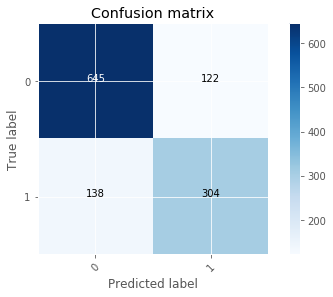

In [17]:
import itertools
target_names = ['0','1']
plot_confusion_matrix(cnf_matrix, classes=target_names, title='Confusion matrix')

plt.show()

In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_train, lr.predict(X_train_std), target_names=target_names))

             precision    recall  f1-score   support

          0       0.81      0.84      0.83      1826
          1       0.69      0.64      0.67       995

avg / total       0.77      0.77      0.77      2821



In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_test, lr.predict(X_test_std), target_names=target_names))

             precision    recall  f1-score   support

          0       0.82      0.84      0.83       767
          1       0.71      0.69      0.70       442

avg / total       0.78      0.78      0.78      1209



In [20]:
lr.coef_

array([[-0.23696373,  0.11047712,  0.43481616,  0.22195842,  0.03014781,
         0.02136636,  0.44061029,  0.05091475, -0.05091475,  0.36746338,
         0.31015813]])

# 檢查訓練資料預測錯誤的情況

In [21]:
df_test_check = X_test.copy()
df_test_check['pred_default'] = lr.predict(X_test_std)
df_test_check['real_default'] = y_test

In [22]:
df_test_check[(df_test_check['real_default']==1) & (df_test_check['pred_default']==0)]

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_6,male,female,married,single,pred_default,real_default
1825,500000.0,35,1,-1,-1,-1,-1,0,1,0,1,0,1
2695,200000.0,28,1,2,2,2,2,0,1,0,1,0,1
3920,50000.0,50,1,-1,3,2,-1,0,1,1,0,0,1
2811,180000.0,33,-1,-1,-1,-1,-1,0,1,0,1,0,1
551,10000.0,24,-1,-1,-1,-1,-1,1,0,0,1,0,1
3229,300000.0,40,-1,3,2,2,2,0,1,0,1,0,1
3058,140000.0,28,-1,2,-1,-1,-1,0,1,1,0,0,1
1482,200000.0,27,-1,-1,-1,-1,-1,1,0,0,1,0,1
3837,230000.0,35,2,2,2,2,-1,0,1,1,0,0,1
347,150000.0,29,-1,2,2,-1,-1,0,1,0,1,0,1
